## Przeanalizować podstawowe algorytmy sortowania (sortowanie bąbelkowe, sortowanie przez wstawianie, sortowanie przez wybór).

#### Narysować schematy blokowe tych algorytmów i przeanalizować ich złożoność czasową.

 - bąbelkowe => bubble.png
 - wstawianie => insert.png
 - wybór => select.png

 - bubble sort: dwie pętle iterujące po każdym elemencie. złożoność czasowa to około $O(n^2)$ dokładniej $O((n-1)(n))$

 - insertion sort dwie pętle iterujące po każdym elemencie, w najgorszym przypadku gdy lista jest w pełni posortowana w odwrotnym kierunku zajmuje $O(n^2)$

 - selection sort. ponownie dwie pętle które w najgorszym przypadku iterują po każdym elemencie $O(n^2)$

Wszystkie z nich w najgorszych przypadkach liczą dokładnie tyle samo czasu. ALE! Najgorszy przypadek to nie jest ten typowy. Zmiennymi definiującymi każdy z tych algorytmów są czasy wykonywania na najlepszego przypdaku $\Omega(n)$ oraz przypadku średniego $\theta(n)$. 

Czas $\Omega$ i $\theta$ dla naszych algorytmów w kolejności jak wyżej to $\Omega(n)$, $\Omega(n)$, $\Omega(n^2)$, oraz $\theta(n^2)$, $\theta(n)$ i $\theta(n^2)$

In [38]:
import numpy as np
import random
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100


def generuj_tablice(wielkosc: int, a: int = -1e7, b: int = +1e7) -> np.array:
    assert wielkosc > 0 and type(wielkosc) == int
    tab = np.zeros(wielkosc)
    for entry in range(wielkosc):
        tab[entry] = random.randint(a, b)
    return tab

def timeit(fn, tablica, **kwargs):
    start = time.time()
    fn(tablica)
    return time.time() - start


In [3]:
def bubble(tab):
    for i in range(len(tab)):
        for j in range(0, len(tab)-1):
            if (tab[j]>tab[j+1]):
                temp=tab[j]
                tab[j]=tab[j+1]
                tab[j+1]=temp
    return tab
                
def insert(tab):
    for i in range(len(tab)):
        for j in range(0,i):
            if (tab[i]<tab[j]):
                temp=tab[i]
                tab[i]=tab[j]
                tab[j]=temp
    return tab
                   
def select(tab):
    for i in range(len(tab)):
        for j in range(i+1,len(tab)):
            if (tab[i]>tab[j]):
                temp=tab[i]
                tab[i]=tab[j]
                tab[j]=temp
    return tab
                
print(bubble(generuj_tablice(5, -10, 10)))
print(insert(generuj_tablice(5, -10, 10)))
print(select(generuj_tablice(5, -10, 10)))

[-6.  0.  1.  7. 10.]
[-8. -7. -7.  2.  2.]
[-8. -6.  8.  8.  9.]


In [31]:
wielkosci = list(range(1, 1001, 20))
czasy = []
max_czasy = []
for funkcja in [bubble, insert, select]:
    czas = []
    max_czas = []
    for size in wielkosci:
        print(size)
        czas_per_wielkosc = []
        for _ in range(10):
            tablica = generuj_tablice(size)
            czas_per_wielkosc.append(timeit(funkcja, tablica))
        czas.append(np.mean(czas_per_wielkosc))
        max_czas.append(np.max(czas_per_wielkosc))
        clear_output(True)
    czasy.append(czas)
    max_czasy.append(max_czas)

981


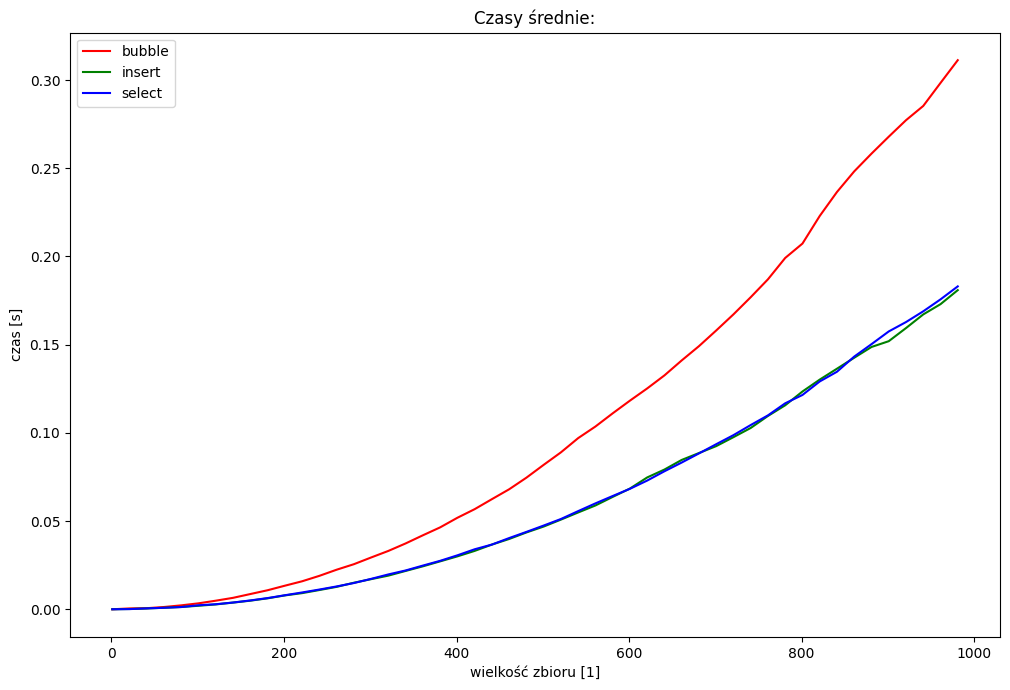

In [32]:
fig = plt.figure()
ax = plt.subplot()
for i in zip(enumerate([bubble, insert, select]), ["red", "green", "blue"]):
    ax.plot(wielkosci, czasy[i[0][0]], color=i[1], label=str(i[0][1]).split()[1])
    ax.legend()
plt.xlabel("wielkość zbioru [1]")
plt.ylabel("czas [s]")
plt.title("Czasy średnie:")
plt.show()

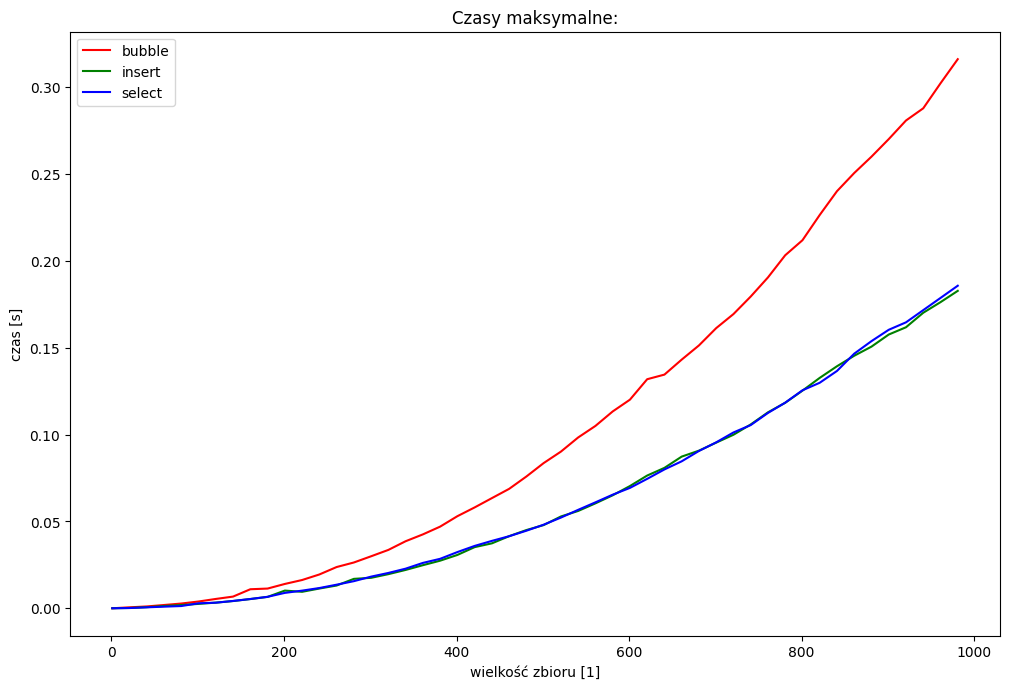

In [33]:
fig = plt.figure()
ax = plt.subplot()
for i in zip(enumerate([bubble, insert, select]), ["red", "green", "blue"]):
    ax.plot(wielkosci, max_czasy[i[0][0]], color=i[1], label=str(i[0][1]).split()[1])
    ax.legend()
plt.xlabel("wielkość zbioru [1]")
plt.ylabel("czas [s]")
plt.title("Czasy maksymalne:")
plt.show()

In [16]:
def bubble_mod1(tab):
    # przerwanie gdy nie było żadnej zamiany
    for i in range(len(tab)):
        for j in range(0, len(tab)-1):
            if (tab[j]>tab[j+1]):
                temp=tab[j]
                tab[j]=tab[j+1]
                tab[j+1]=temp
            else:
                continue
    return tab

def bubble_mod2(tab):
    # jedno mniej co iteracje
    for i in range(len(tab)):
        for j in range(0, len(tab)-1 - i):
            if (tab[j]>tab[j+1]):
                temp=tab[j]
                tab[j]=tab[j+1]
                tab[j+1]=temp
    return tab

print(bubble_mod1(generuj_tablice(5, -10, 10)))
print(bubble_mod2(generuj_tablice(5, -10, 10)))

[-5. -5.  0.  8.  9.]
[-8. -7. -5. -4. -3.]


In [34]:
wielkosci = list(range(1, 1001, 20))
czasy = []
max_czasy = []
for funkcja in [bubble, bubble_mod1, bubble_mod2]:
    czas = []
    max_czas = []
    for size in wielkosci:
        print(size)
        czas_per_wielkosc = []
        for _ in range(10):
            tablica = generuj_tablice(size)
            czas_per_wielkosc.append(timeit(funkcja, tablica))
        czas.append(np.mean(czas_per_wielkosc))
        max_czas.append(np.max(czas_per_wielkosc))
        clear_output(True)
    czasy.append(czas)
    max_czasy.append(max_czas)

981


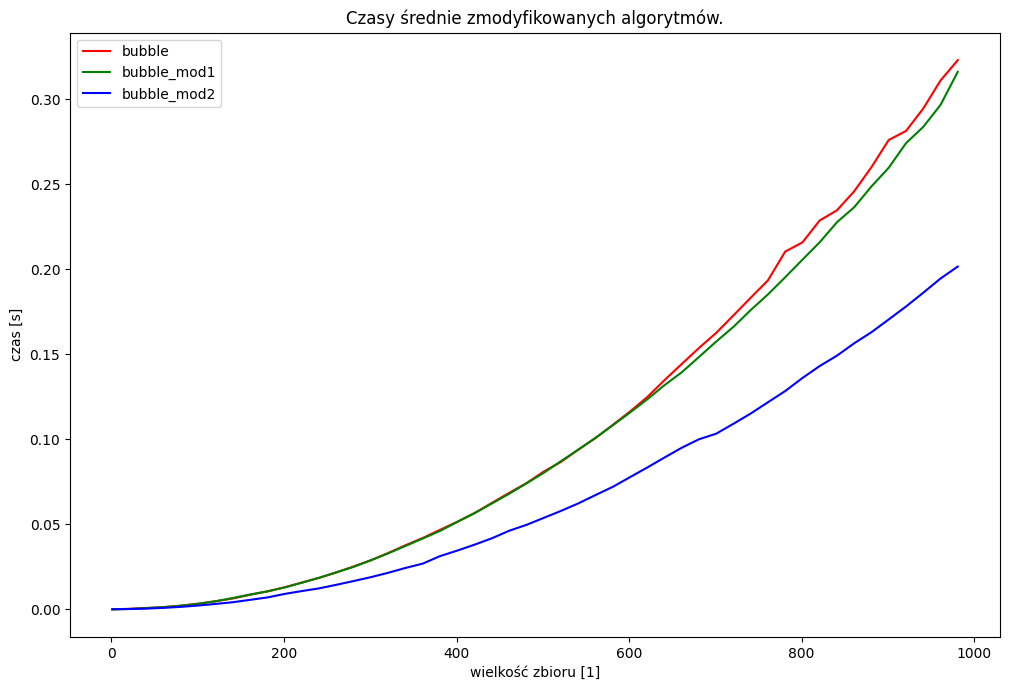

In [35]:
fig = plt.figure()
ax = plt.subplot()
for i in zip(enumerate([bubble, bubble_mod1, bubble_mod2]), ["red", "green", "blue"]):
    ax.plot(wielkosci, czasy[i[0][0]], color=i[1], label=str(i[0][1]).split()[1])
    ax.legend()
plt.xlabel("wielkość zbioru [1]")
plt.ylabel("czas [s]")
plt.title("Czasy średnie zmodyfikowanych algorytmów.")
plt.show()

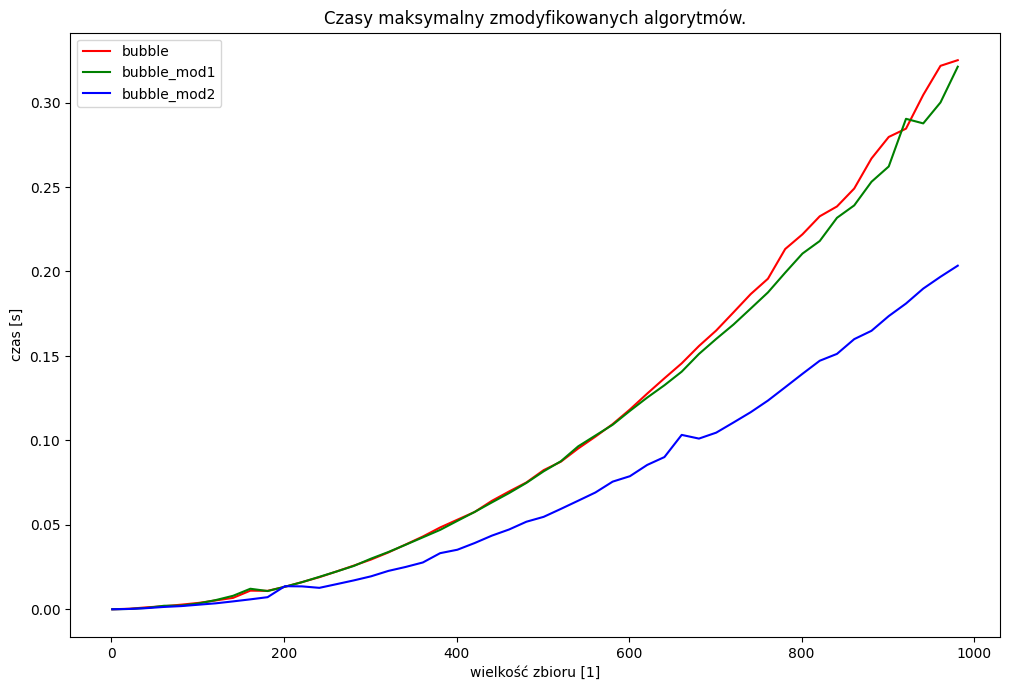

In [39]:
fig = plt.figure()
ax = plt.subplot()
for i in zip(enumerate([bubble, bubble_mod1, bubble_mod2]), ["red", "green", "blue"]):
    ax.plot(wielkosci, max_czasy[i[0][0]], color=i[1], label=str(i[0][1]).split()[1])
    ax.legend()
plt.xlabel("wielkość zbioru [1]")
plt.ylabel("czas [s]")
plt.title("Czasy maksymalny zmodyfikowanych algorytmów.")
plt.show()